# Statistical Language Models
Ever wonder how great works like 'To Kill a Mockingbird' and 'one fish, two fish, red fish, blue fish' are made? Well I can tell you for sure that it's not the way that I'm going to be describing. When you write you don't one hundread percent, at least for me, think of ever possible choice of words that can follow one word. You usually just have a thought and translate that to letters. Well, what if we did do that? Just choose a word then randomly choose another one and then another and so on. Where do we start? do we need a dictionary? How could the sentences make sense? So we start by taking a piece of text already written, that'll work as our 'dictionary' for now. From there we can use different methods of using the probability that a word shows up in the text to make our text. 

## Gram Model
The gram model is a model that says that instead of picking words at random we should assign a probably to each word, in terms of how often they occur. With this we can make some pretty coherent sentences proabably. The method is illustrated mathematically by

\begin{align*}
&\text{Unigram}: P(w_i|w_1w_2\ldots w_{i - 1}) = P(w_i)\\
&\text{Bigram}: P(w_i|w_1w_2\ldots w_{i - 1}) = P(w_i|w_1)\\
&\text{Trigram}: P(w_i|w_1w_2\ldots w_{i - 1}) = P(w_i|w_1w_2)
\end{align*}

For the unigram model, it takes the first word, which is indeed choosen at random from the text and calcualtes every word that comes after. From there it choose one of those based on the probability of that word appearing in the text. The other models are similar, but it uses more words as reference, for example the bigram uses two words to find out which words come next. 

We'll first import a text to manipulate, Hamlet by Shakespeare

In [7]:
from numpy.random import choice
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

In [3]:
file = open("HAMLET.txt")
hamlet = file.read()
file.close()
hamlet = hamlet.lower()
punctuation = "#:;,.!?-[]*"
for char in punctuation:
    hamlet = hamlet.replace(char,'')
words = hamlet.split()
wordcount = {}
for word in words:
    if word in wordcount:
        wordcount[word] += 1
    else:
        wordcount[word] = 1
sorted_words = sorted(wordcount.items(),key = lambda x: x[1], reverse = True)

This code opens up the text file, from there we remove the punctuation and chabge the case to lower chase for all the characters. Next, we split up all the words so that they all exist in a list where each word is a single element. Then we put all the words in a dictionary where there name is a key and the value is the amount of times it came up in the text. Fianlly we sort by the amount of times a word appeared. With all this we can generate a pie chart to see the words that occur the most.  

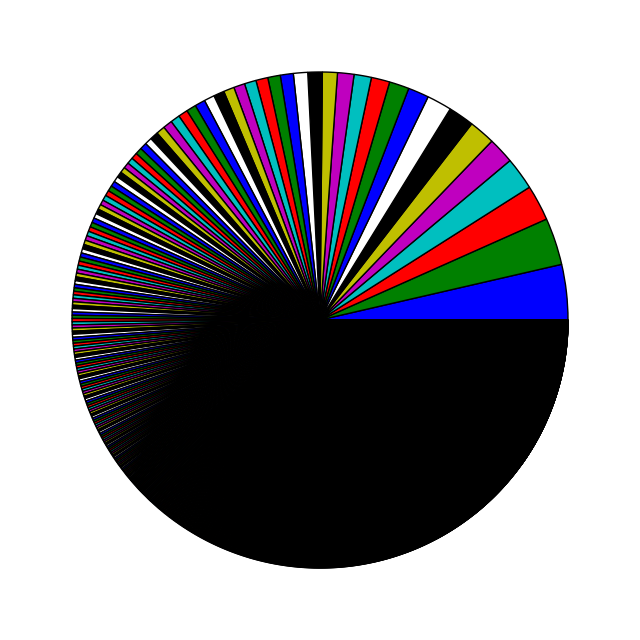

In [4]:
def get_count(x):
    return x[1]
counts1 = [get_count(pair) for pair in sorted_words]
plt.figure(figsize=(8,8))
plt.pie(counts1);

Well this isn't very clear, lets shorten the amount of words and label them. This will give us a better idea of what words are used in most writings, not just Hamlet.

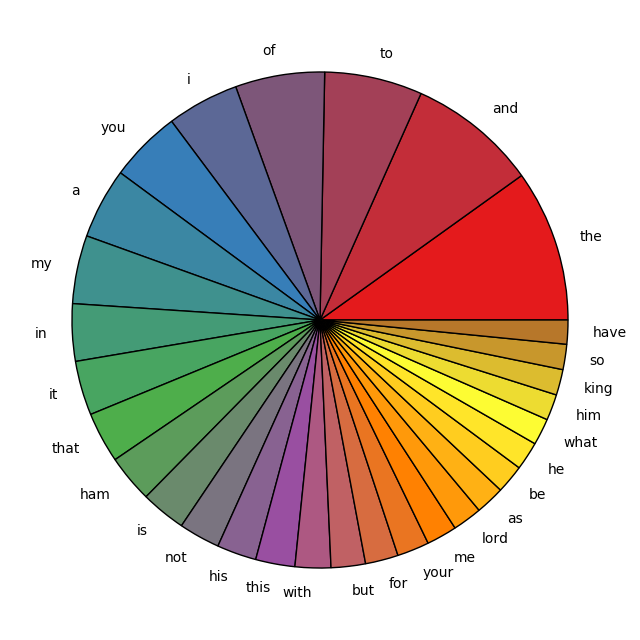

In [5]:
nlabels = 30 
counts2 = [get_count(pair) for pair in sorted_words[:nlabels]]
labels = [pair[0] for pair in sorted_words[:nlabels]]
plt.figure(figsize=(8,8))
cs=cm.Set1(np.arange(40)/40.)
plt.pie(counts2, labels = labels, colors = cs);

As we can see, the most commonly used words are 'the','and','to' and 'of.' We can plot the words against the amount of times they appear to see if we see any trends.

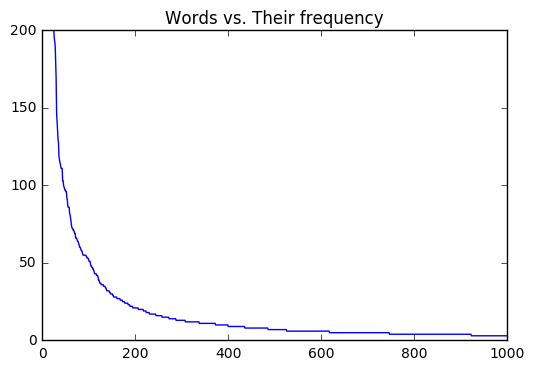

In [6]:
plt.title('Words vs. Their frequency')
plt.plot(counts1)
plt.xlim(0,1000)
plt.ylim(0,200);

Since its an exponential we should try a log vs log graph and see if we get a straight line, if so then the trend is exponential.

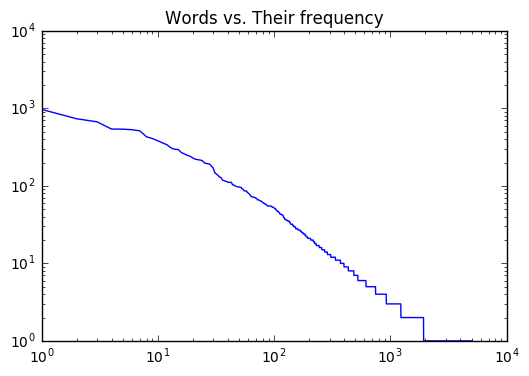

In [7]:
plt.loglog(counts1)
plt.title('Words vs. Their frequency');

From the grpah we can see a sort of linear relation, which leads me to say that its almost an exponential relation. Next, we can do the same thing with another book. All the code is the same, along with the process, so we'll just run through that now.

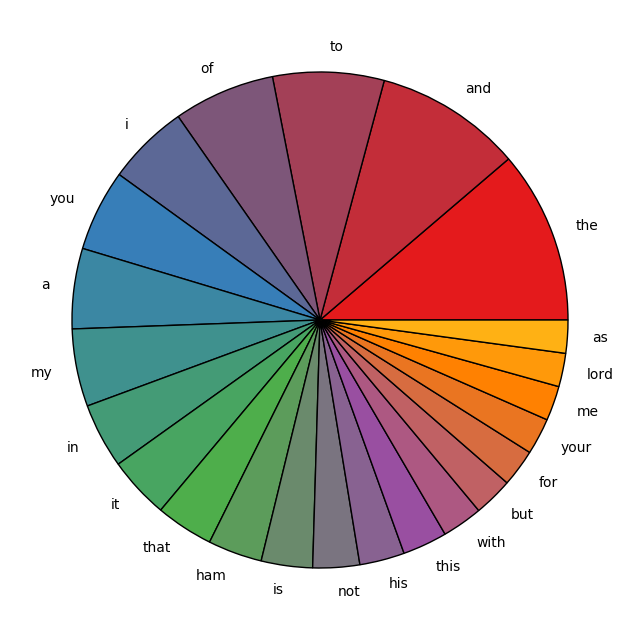

In [8]:
file = open("LLOYD.txt")
lloyd1 = file.read()
file.close()
lloyd1 = lloyd.lower()
punctuation = "#:;,.!?-[]*"
for char in punctuation:
    lloyd = lloyd.replace(char,'')
lloyd1 = lloyd.split()
wordcount2 = {}
for word in lloyd:
    if word in wordcount2:
        wordcount2[word] += 1
    else:
        wordcount2[word] = 1
sorted_words2 = sorted(wordcount2.items(),key = lambda x: x[1], reverse = True)
nlabels = 23
counts3 = [get_count(pair) for pair in sorted_words2]
new_counts = [get_count(pair) for pair in sorted_words[:nlabels]]
new_labels = [pair[0] for pair in sorted_words[:nlabels]]
plt.figure(figsize=(8,8))
cs=cm.Set1(np.arange(40)/40.)
plt.pie(new_counts, labels = new_labels, colors = cs);

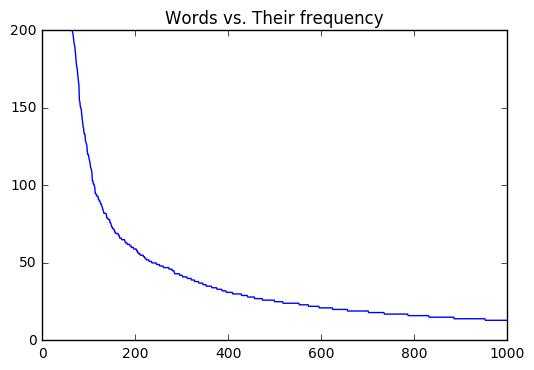

In [9]:
plt.title('Words vs. Their frequency')
plt.plot(counts3)
plt.xlim(0,1000)
plt.ylim(0,200);

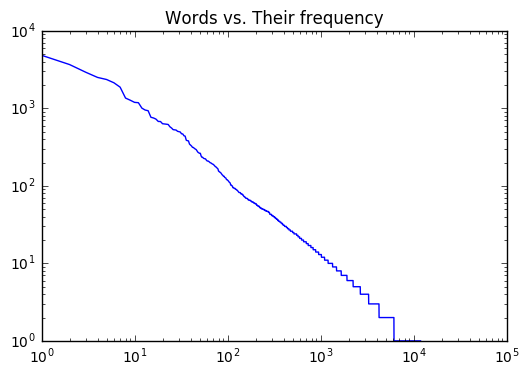

In [10]:
plt.loglog(counts3)
plt.title('Words vs. Their frequency');

As you can see its similar to the previous text, where the frequency of words decreases exponentially. This makes sense that most words aren't used that often. 

## Part 2. 
For this part, I chose an author named John Uri Lloyd, who only has one book on Project Gutenburg sadly. Anyway, we are now going to implement the gram model to make sentences that resemble the ones Lloyd would write. We need to write an algorithm that will tell us how often a word appears in the text. We do that by generating a dictionary of all the words, were the word is the key and the entry is the amount of times it appears. 

In [80]:
file = open("LLOYD.txt")
lloyd = file.read().split()
file.close()

In [4]:
def calculate_probabilities(wordlist):
    total_words = len(wordlist)
    wordcount = {word: 0 for word in wordlist}
    for word in wordlist:
        wordcount[word] += 1
    return list(wordcount.keys()), [freq/total_words for freq in wordcount.values()]

Now, we can calcluate the unigram model by simply assigning the keys to one variable and the etries to another

In [82]:
unigram = calculate_probabilities(lloyd)
w1, p1 = unigram
print(len(w1))

18241


For the unigram model, we see that there are 18241 unique words. Now we can create more models.

In [9]:
def calculate_bigrams(words):
    firstwords = words[:-1]
    secondwords = words[1:]
    wordlists = {word: [] for word in firstwords}
    for word1, word2 in zip(firstwords, secondwords):
        wordlists[word1].append(word2)
    return {word: calculate_probabilities(following) for word, following in wordlists.items()}

In [10]:
def calculate_trigrams(words):
    firstwords = words[:-2]
    secondwords = words[1:-1]
    thirdwords = words[2:]
    wordlists = {word: [] for word in zip(firstwords, secondwords)}
    for word1, word2, word3 in zip(firstwords, secondwords, thirdwords):
        wordlists[(word1,word2)].append(word3)
    return {word: calculate_probabilities(following) for word, following in wordlists.items()}

In [11]:
def calculate_quadgrams(words):
    firstwords = words[:-3]
    secondwords = words[1:-2]
    thirdwords = words[2:-1]
    fourthwords = words[3:]
    wordlists = {word: [] for word in zip(firstwords, secondwords, thirdwords)}
    for word1, word2, word3, word4 in zip(firstwords, secondwords, thirdwords, fourthwords):
        wordlists[(word1,word2,word3)].append(word4)
    return {word: calculate_probabilities(following) for word, following in wordlists.items()}

In [12]:
bigram = calculate_bigrams(lloyd)
trigram = calculate_trigrams(lloyd)
quadgram = calculate_quadgrams(lloyd)

In [101]:
print("The number of bigrams are", len(bigram))
print("The number of trigrams are", len(trigram))
print("The number of quadgrams are", len(quadgram))

The number of bigrams are 18241
The number of trigrams are 72418
The number of quadgrams are 106328


As you can see there are more unique quadrams than bigrams or trigrams. This makes sense because for each word we need to go through the list of words that follow it, but we do that up to 3 words, so well have tons of combonations. 

## Part 3.
For this part we need to create paragraphs using the methods defined above. For each method we first pick a random word from our text then develop the stroy based off that first word. For the more in depth models, we use more word groups to get better sounding sentences. 

In [5]:
file = open("BLINK.txt")
lloyd = file.read().split()
file.close()
unigram = calculate_probabilities(lloyd)
w1, p1 = unigram

In [14]:
nwords = 200
for word in choice(lloyd, size = nwords):
    print(word,end = ' ')

act And the you I was And When hint by when And three I'm prom amused your like have inside guy year should last when wish that this But shows nervous forever and I the would was story but Someone when I'm come make short and from days up friends wait I what's look a capable late I'm look this room growing I'm boy I the last, Checked on night in You'll sleep The I'm I'm in I your Please that this outside Let's last night should you my hazards to shadow up every behind ever night that's for face is I'm on twenty make in it's almost drink, treason turn me That's Forever you three show a not you to move cause alright face did store, What I'm head And to so My time I've about my go morgue if ignore once hand? I And up it I from one Honest, and wish make go last hell miss When movie by And what's away you nervous friends That's sick waste the me She me Catching you growing ever storms Well, your possess me upon Please right melt and the again, minute can't To Sally what fall face for you'll

In [18]:
nwords = 200
firstword = choice(w1,p = p1)
print(firstword,end = ' ')
for i in range(nwords):
    wb, wp = bigram[firstword]
    firstword = choice(wb, p= wp)
    print(firstword,end = ' ')

when he's gone I'm probably gonna miss you, I won't last, when I should take themselves so haunting every time she walked away from a fuckin' boy She makes me Nobody likes you at a star But everybody's gone And I'm not worthy for a buck short I'm always nervous so haunting every time I should act my book, with those eyes Please don't hint that you're twenty three And I'm flailing now And I've been here for too long To face this is growing up inside my age What's my age What's my age again? What's my pants But that understands Sees through the storms gone I'm flailing now And sees through the hell is wrong if we want Where you when I guess this last forever Forever and walk by prank phone I miss you, I should act my book, with a buck short I'm all the line Why would you smile, I stared I was in the girl, left the storms gone I'm jealous of your hand? Is it out, it was only me Nobody likes you and she took her mom from a Friday night last forever Forever and eating their insides Like ind

In [17]:
nwords = 200
firstword = choice(w1,p = p1)
wb, wp = bigram[firstword]
secondword = choice(wb,p = wp)
print(firstword,end = ' ')
print(secondword,end = ' ')
for i in range(nwords):
    wbb, wpp = trigram[firstword, secondword]
    firstword = secondword
    secondword = choice(wbb, p= wpp)
    print(secondword,end = ' ')

A.D.D.? My friends say I should act my age again? In the car I just can't wait To pick you up on our very first kiss A target that I'm probably gonna miss Let's go Don't wait This night's almost over Honest, let's make This night last forever Push it out, fake a smile Avert disaster just in time I need a drink, cause in a while Worthless answers from friends of mine It's dumb to ask, cool to ignore Girls possess me but they're never mine I made my entrance Avoided hazards Checked my engine I fell behind She makes me feel like it's raining outside And when the storms gone I'm all torn up inside I'm always nervous on days like this like the prom I get too scared to move cause I'm still Just a stupid, worthless boy 

KeyError: ('worthless', 'boy')

In [13]:
nwords = 200
firstword = choice(w1,p = p1)
wb, wp = bigram[firstword]
secondword = choice(wb,p = wp)
wbb, wpp = trigram[firstword,secondword]
thirdword = choice(wbb,p = wpp)
print(firstword,end = ' ')
print(secondword,end = ' ')
print(thirdword,end = ' ')
for i in range(nwords):
    wbbb, wppp = quadgram[firstword, secondword,thirdword]
    firstword = secondword
    secondword = thirdword
    thirdword = choice(wbbb, p= wppp)
    print(thirdword,end = ' ')

many years ahead to fall in line Why would you wish that on me? I never want to act my age What's my age again, what's my age again? Then later on, on the drive home I called her mom from a pay phone I said I was the cops And your husband's in jail The state looks down on sodomy And that's about the time she walked away from me Nobody likes you when you're twenty three And I'm still more amused by prank phone calls What the hell is wrong with me? My friends say I should act my age What's my age again, what's my age again? In the car I just can't wait To pick you up on our very first date Is it cool if I hold your hand? Is it wrong if I think it's lame to dance? Do you like my stupid hair? Would you guess that I didn't know what to wear? I'm just scared of what you think about me I won't try to argue or hold it against you I know that you're leaving, you must have your reasons The season is calling, your pictures are falling down The steps that I retrace, 

As you can read, it gets more coherent as the model gets more in depth. With the quadgram model, we still get moments of nonsense, but overall it's closer to an actually body of work. What I noticed was that at the trigram model it started to actually seem like a real sentence, grammatically speaking, but the quadgram was the only one that was actaully sufficient; it started to seem like it was written by Lloyd.

## Part 4.
Next we are going to calculate the perplexity of each model to see how good it is at constructing paragraphs. The lower the perplexity the less choice there is for the words prceeding each other word. 

In [94]:
unigram_dict = {word:prob for word, prob in zip(w1,p1)}
bigram_dict = {word1:{word2 : prob for word2, prob in zip(*value)} for word1, value in bigram.items()}
trigram_dict = {word1: {word3 : prob for word3, prob in zip(*value)}for word1, value in trigram.items()}
quadgram_dict = {word1: {word3 : prob for word3, prob in zip(*value)}for word1, value in quadgram.items()}

In [102]:
total = 0
for word in lloyd:
    prob = unigram_dict[word]
    total += np.log2(prob)
perplexity = 2**(-total/len(lloyd))
print("Unigram perplexity = {}".format(perplexity))

Unigram perplexity = 1314.3959296387015


In [103]:
total = 0
word1 = lloyd[0]
prob = unigram_dict[word1]
total += np.log2(prob)
for word2 in lloyd[1:]:
    prob = bigram_dict[word1][word2]
    total += np.log2(prob)
    word1 = word2
perplexity = 2**(-total/len(lloyd))
print("Bigram perplexity = {}".format(perplexity))

Bigram perplexity = 29.704015217004343


In [104]:
total = 0
word1 = lloyd[0]
prob = unigram_dict[word1]
total += np.log2(prob)
word2 = lloyd[1]
prob = bigram_dict[word1][word2]
total += np.log2(prob)
for word3 in lloyd[2:]:
    prob = trigram_dict[word1,word2][word3]
    total += np.log2(prob)
    word1 = word2
    word2 = word3
perplexity = 2**(-total/len(lloyd))
print("Trigram perplexity = {}".format(perplexity))

Trigram perplexity = 2.5316372751752816


In [105]:
total = 0
word1 = lloyd[0]
prob = unigram_dict[word1]
total += np.log2(prob)
word2 = lloyd[1]
prob = bigram_dict[word1][word2]
total += np.log2(prob)
word3 = lloyd[2]
prob = trigram_dict[word1, word2] [word3]
total += np.log2(prob)
for word4 in lloyd[3:]:
    prob = quadgram_dict[word1,word2, word3][word4]
    total += np.log2(prob)
    word1 = word2
    word2 = word3
    word3 = word4
perplexity = 2**(-total/len(lloyd))
print("quadgram perplexity = {}".format(perplexity))

quadgram perplexity = 1.1428310475557988


As we can see, the quadgram model has an almost 1 perplexity which means that given a set of third initial words, the paragrah is sort of played out. The uniqueness of each paragraph is less because the choice of the words is basically determined. For the Unigram however, it has a 1200 perplexity which means that it basically just generates random sentences, which makes sense if you just read any paragraph it generates. 